In [1]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# MySQL 연결 정보
DB_HOST = "15.168.145.74" 
DB_USER = "lab09"  
DB_PASSWORD = "Multi1234!" 
DB_NAME = "my_db" 

In [3]:
# MySQL에서 데이터 가져오기
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
car_siren = f"SELECT * FROM merge_car_siren"
car_horn = f"SELECT * FROM merge_car_horn"
car_driving = f'SELECT * FROM merge_car_driving_sound'
motorcycle_horn  = f'SELECT * FROM merge_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge_motorcycle_driving_sound'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

/tmp/ipykernel_6302/1700635407.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_6302/1700635407.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_6302/1700635407.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_6302/1700635407.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sq

In [4]:
# 각 데이터에 라벨 추가
car_siren_df["label"] = "사이렌"
car_horn_df["label"] = "차량 경적"
car_driving_df["label"] = "차량 주행음"
motorcycle_horn_df["label"] = "이륜차 경적"
motorcycle_driving_df["label"] = "이륜차 주행음"

# 5개 데이터 병합
df = pd.concat([car_siren_df, car_horn_df, car_driving_df, motorcycle_horn_df, motorcycle_driving_df], ignore_index=True)


In [12]:
# 🚀 MFCC 1~13까지 확장하여 더 많은 특징 사용
features = [f"mfcc_{i}" for i in range(1, 14)]  # mfcc_1 ~ mfcc_13 사용
X = df[features]  # 입력 데이터
y = df["label"]  # 소음 유형 (정답 라벨)



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

✅ 모델 정확도: 0.91


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47116 (\N{HANGUL SYLLABLE REN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47452 (\N{HANGUL SYLLABLE RYUN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarni

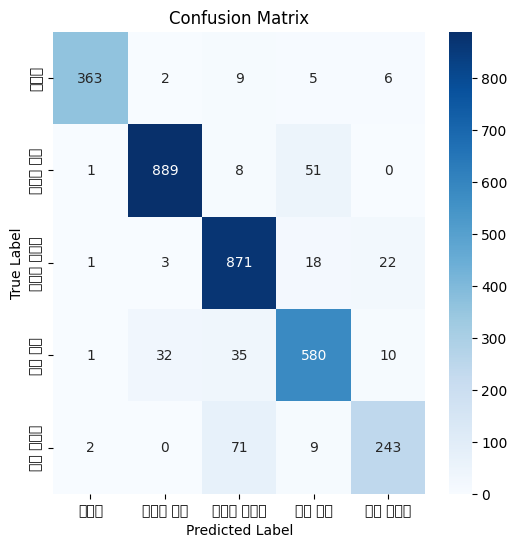

In [16]:
# 예측 수행
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ 모델 정확도: {accuracy:.2f}")

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47116 (\N{HANGUL SYLLABLE REN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47452 (\N{HANGUL SYLLABLE RYUN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarni

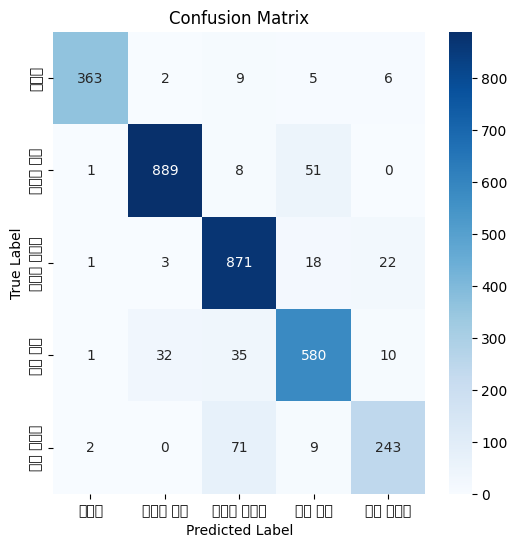

In [17]:
# Confusion Matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         사이렌       0.99      0.94      0.96       385
      이륜차 경적       0.96      0.94      0.95       949
     이륜차 주행음       0.88      0.95      0.91       915
       차량 경적       0.87      0.88      0.88       658
      차량 주행음       0.86      0.75      0.80       325

    accuracy                           0.91      3232
   macro avg       0.91      0.89      0.90      3232
weighted avg       0.91      0.91      0.91      3232

